### Black-hole binary formation channels with gaussian mixtures.
#### Tasks

1) Load this file (`np.load`) and complete a quick exploration of the data. How many modes do you think you see?


In [1]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture


plt.rc('text', usetex=True)  
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
X = np.load("../solutions/formationchannels.npy")

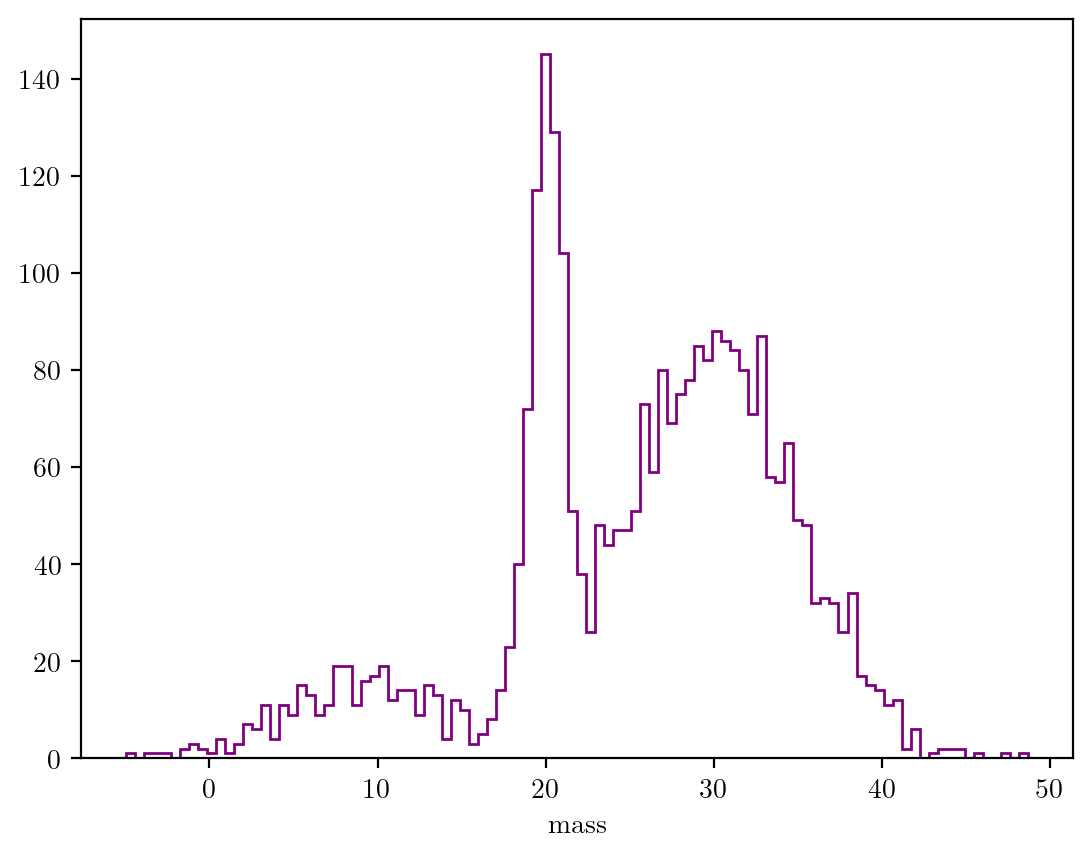

In [3]:
plt.hist(X, bins=100, histtype='step', color='purple')
plt.xlabel('mass')
plt.show()

It seems to have 3 modes


2) Take some time to explore `sklearn.mixture.GaussianMixture`. Check the documentation, some examples, the help menu, etc. You first need to define the model (instance of a class), and then train it on the data using the `fit` method (the data provided are already in the right numpy format!). This will output the trained model, which has various attributes.

*Note*. We'll do a more formal introduction to scikit-learn in one of the next lectures. This is meant to be a formative example on how you might find yourself dealing with a library you've never seen before. This happens *all the time* in scientific research!

3) Complete the fit 10 times with $N=1,...,10$ Gaussians. 

Note: `sklearn` by default will use the so-called [Expectation-Maximization algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm), which is one of the many great things in data science we don't have time to study in detail.


4) For each of this fits, compute the AIC (easy! It's a attribute of the trained model!). Plot $N$ vs AIC: which model is preferred?

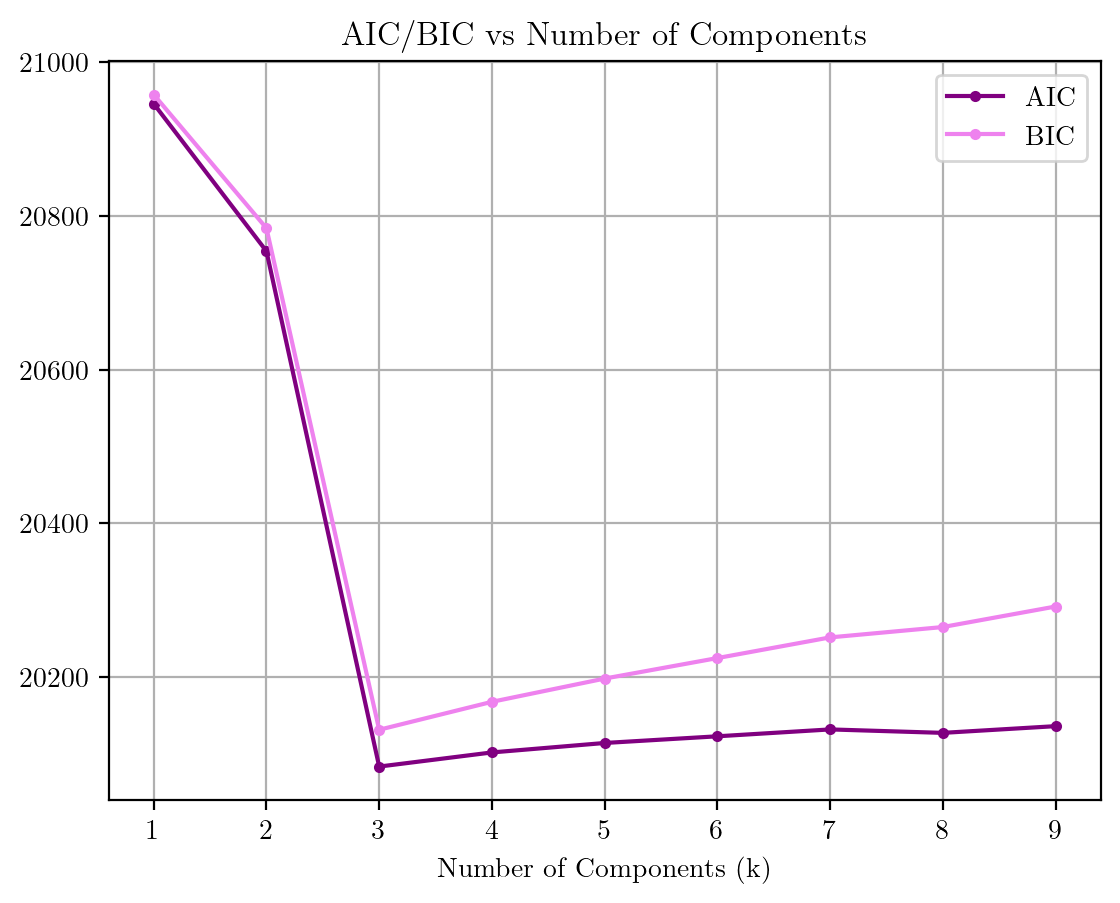

In [4]:
models = [GaussianMixture(n_components=k).fit(X.reshape(-1, 1)) for k in range(1, 10)]

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

plt.plot(range(1, 10), AIC, marker='.', color='purple', label='AIC')
plt.plot(range(1, 10), BIC, marker='.', color='violet', label='BIC')
plt.xlabel('Number of Components (k)')
plt.title('AIC/BIC vs Number of Components')
plt.grid()
plt.legend(loc='upper right')
plt.show()



5) Plot the preferred solution on top of the input data. You should get a very nice fit!

6) Understand (i.e. plot) which Gaussian mode corresponds to which part of the input dataset. 

*Hint:* Useful methods here are `score_samples` and `predict_proba`: you'll need them both. Try to understand what they do and how you can put them together.



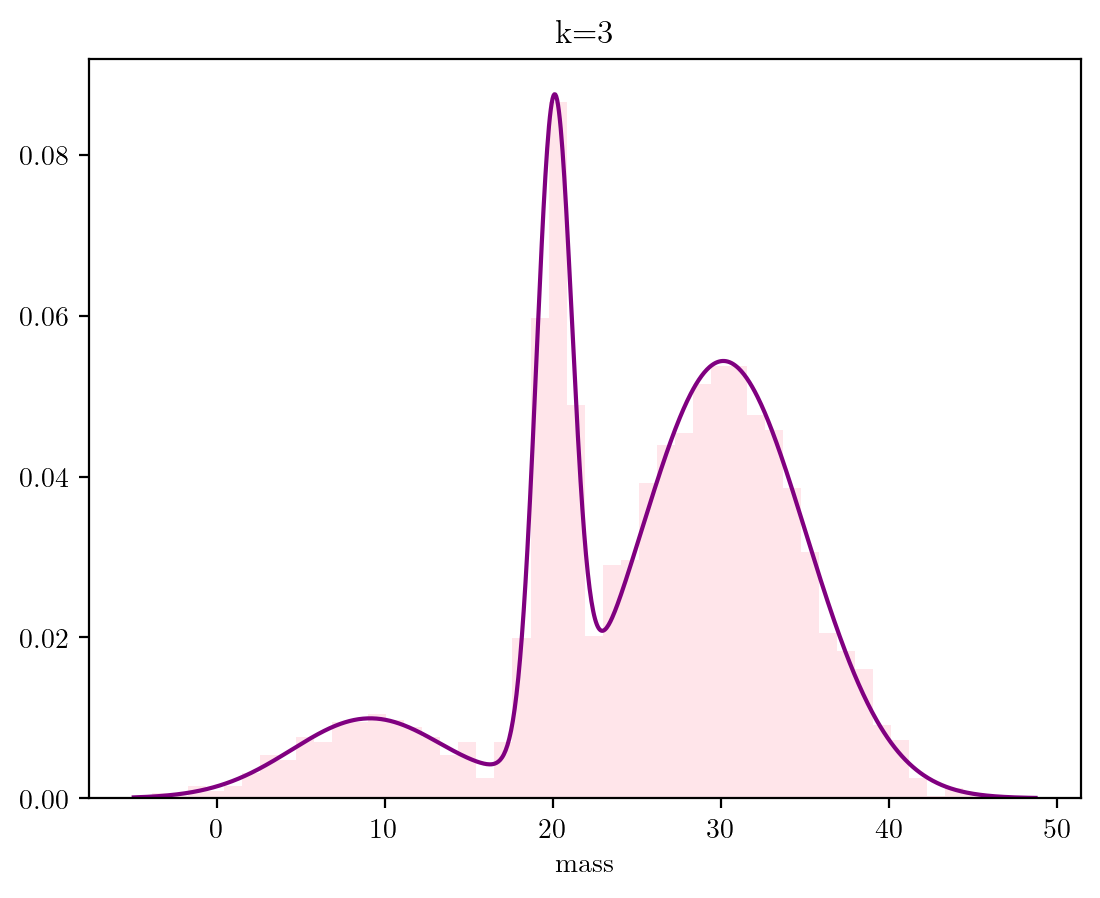

In [7]:
gmm_best = models[np.argmin(AIC)]

x = np.linspace(min(np.array(X)), max(np.array(X)), 1000)
logprob = gmm_best.score_samples(x.reshape(-1, 1)) #log for numerical reasons
pdf = np.exp(logprob)

# PDF for each component
#predict_proba returns a matrix w/ row corresponds to a data point
#and column corresponds to a mixture component
#posterior probab that a point belongs to each of the mixture components
#The entries in this matrix are the probabilities that each data point belongs to each component.
responsibilities = gmm_best.predict_proba(x.reshape(-1, 1)) 
pdf_individual = responsibilities * pdf[:, np.newaxis]

plt.hist(X, 50, density=True, histtype='stepfilled', alpha=0.4, color='pink')

plt.plot(x, pdf, color='purple')

plt.xlabel('mass')
plt.title(f'k={gmm_best.n_components}')
plt.show()


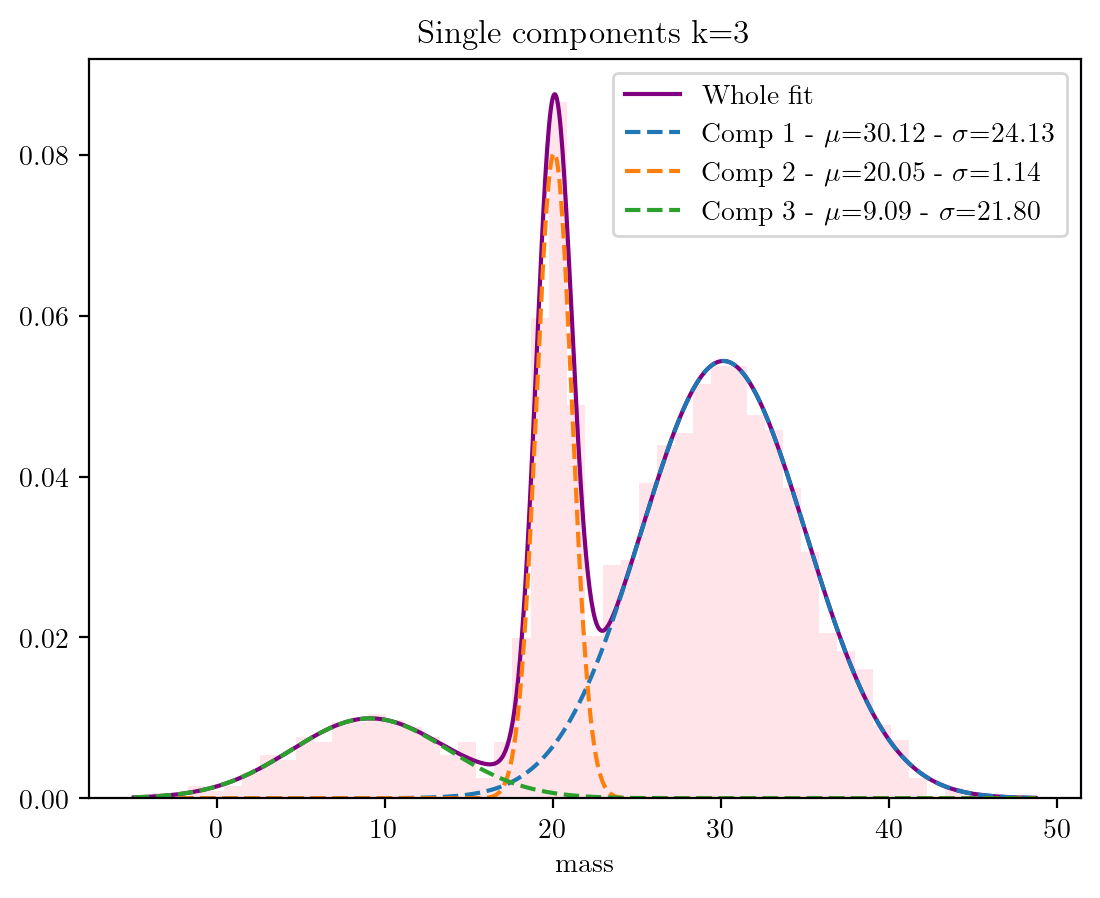

In [8]:
plt.hist(X, 50, density=True, histtype='stepfilled', alpha=0.4, color='pink')

plt.plot(x, pdf, label='Whole fit', color='purple')

for i in range(pdf_individual.shape[1]):
    plt.plot(x, pdf_individual[:, i], '--', label=f'Comp {i+1} - $\mu$={gmm_best.means_[i][0]:.2f} - $\sigma$={gmm_best.covariances_[i][0][0]:.2f}')

plt.xlabel('mass')
plt.title(f'Single components k={gmm_best.n_components}')
plt.legend(loc='upper right')
plt.show()

In [50]:
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.cluster import MeanShift

Number of estimated clusters: 3
[0 1 2]
number of estimated clusters : 3


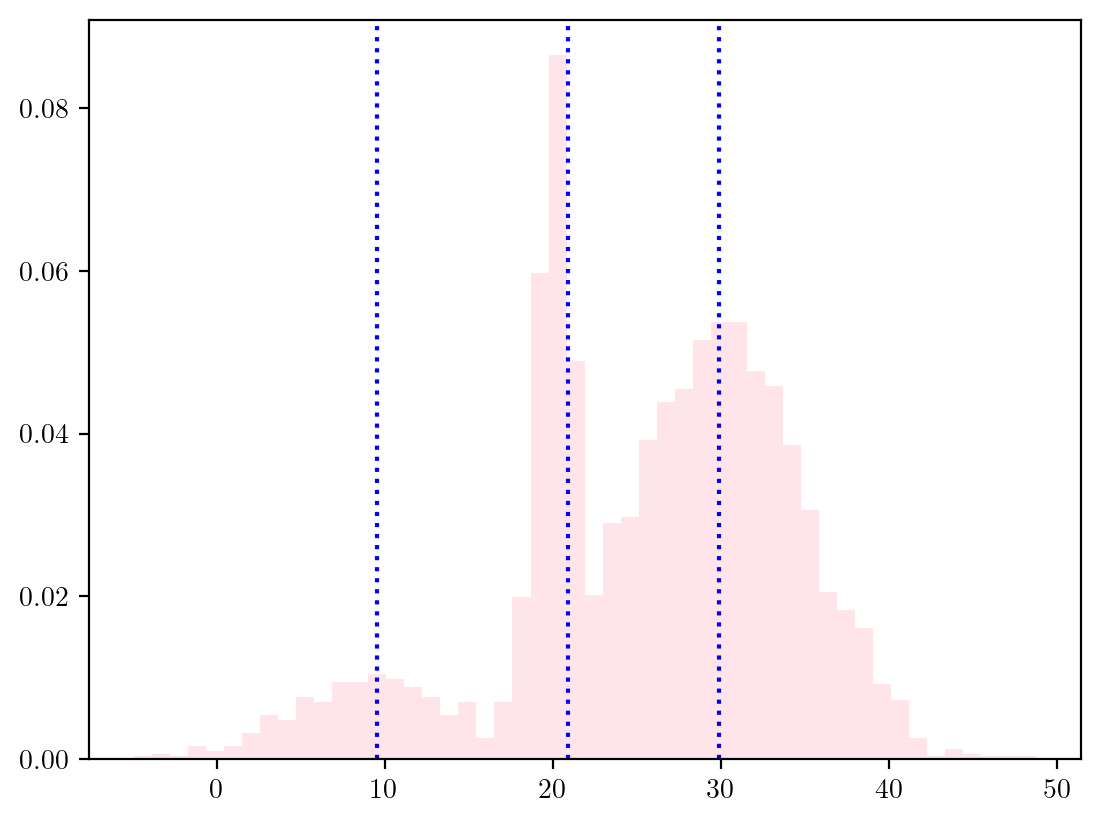

In [51]:

scaler = preprocessing.StandardScaler()
 
ms = MeanShift(bandwidth=0.5, bin_seeding=True, cluster_all=True) 
ms.fit(scaler.fit_transform(X))

labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique>=0])
print('Number of estimated clusters:',n_clusters)

labels_ms = ms.labels_
labels_unique = np.unique(labels_ms)
n_clusters = len(labels_unique[labels_unique >= 0])

centers_ms = ms.cluster_centers_
centers_original_ms = scaler.inverse_transform(centers_ms)

print(labels_unique)
print("number of estimated clusters :", n_clusters)

centers_original_ms = scaler.inverse_transform(centers_ms)

plt.hist(X, 50, density=True, histtype='stepfilled', alpha=0.4, color='pink')

for c in centers_original_ms: 
    plt.axvline(c, color='blue', ls='dotted', label=f'Cluster center: {cen:.2f}')
